# <CENTER>STUDENTS PERFORMANCE EDA

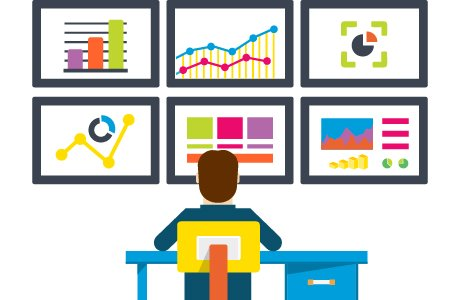

#### Student performance is a crucial factor in the educational system.

Understanding the factors that impact student performance can help educators and policy-makers make informed decisions about how to improve education outcomes. Exploratory Data Analysis (EDA) is a powerful tool for analyzing data and identifying patterns, trends, and relationships.

The aim of this project is to perform an EDA on a dataset that contains information about student performance in math and language courses. The dataset includes variables such as gender, age, family background, study time, and test scores. The goal is to identify patterns and relationships that may exist between these variables and student performance.

This project will begin with data cleaning and preparation, followed by exploratory data analysis to identify relationships and patterns in the data. The findings of this analysis will be used to draw conclusions and make recommendations for improving student performance.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,\
ExtraTreesRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import LinearSVR

In [3]:
df=pd.read_csv('StudentsPerformance.csv')

In [4]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [7]:
df.sample()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
194,female,group C,master's degree,standard,completed,69,84,85


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [14]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [17]:
df.duplicated().sum()

0

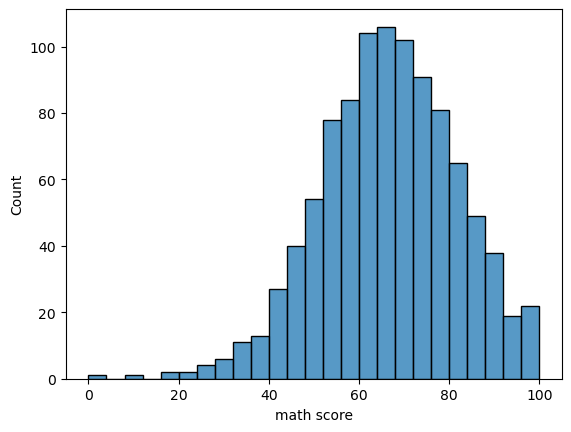

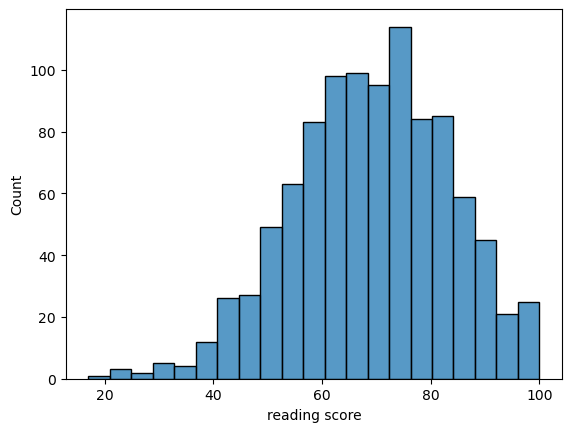

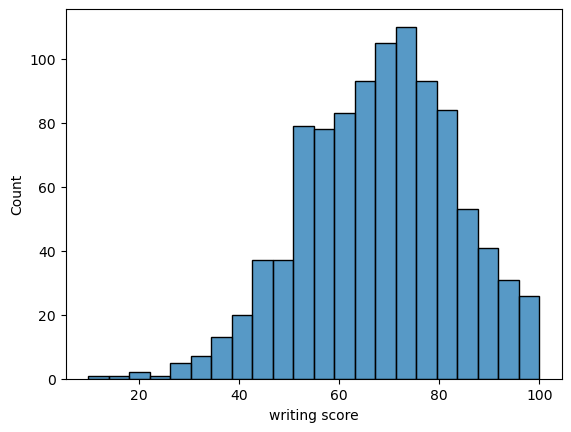

In [18]:
for i in df.columns:
    if df[i].dtypes!="object":
        sns.histplot(x=df[i])
        plt.show()

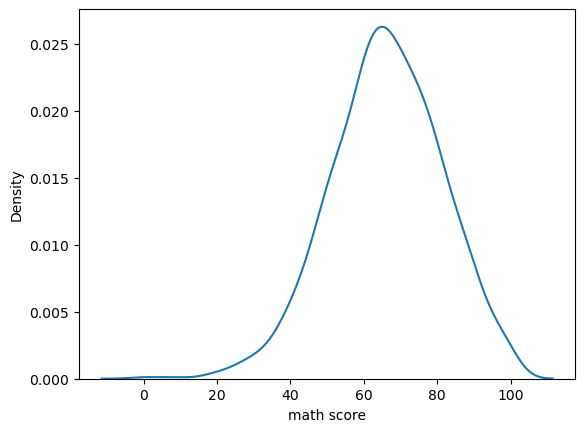

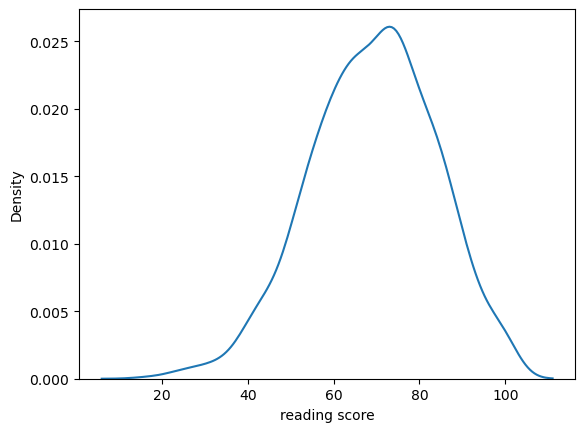

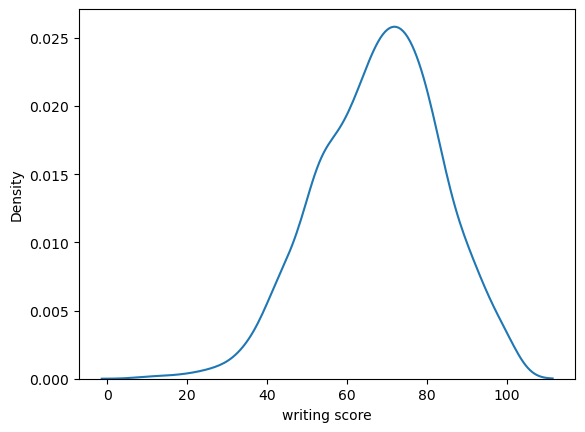

In [20]:
for i in df.columns:
    if df[i].dtypes!="object":
        sns.kdeplot(x=df[i])
        plt.show()

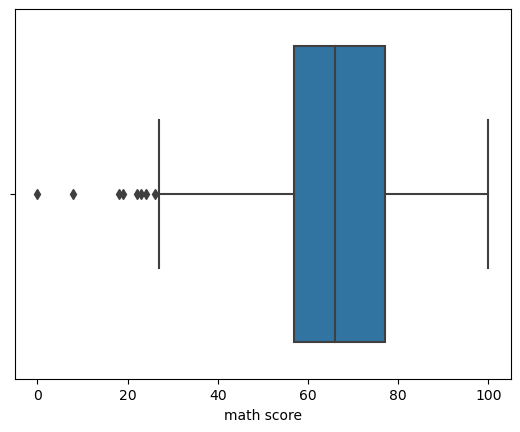

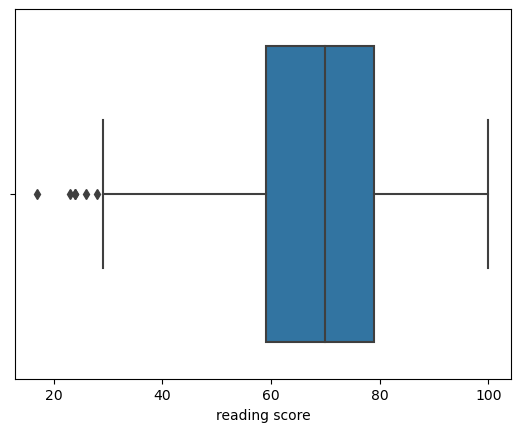

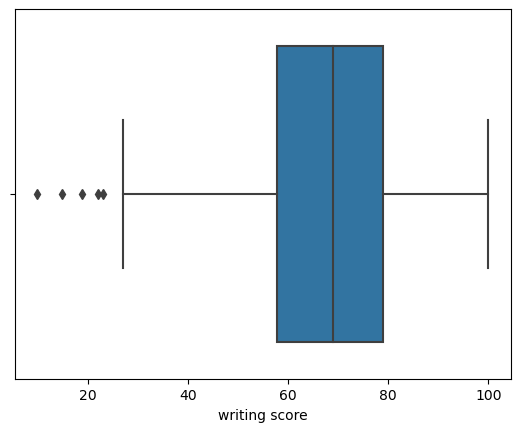

In [21]:
for i in df.columns:
    if df[i].dtypes!="object":
        sns.boxplot(x=df[i])
        plt.show()

In [22]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [25]:
for i in df.columns:
    if df[i].dtype !="object":
        UL,LL=outlier_limit(df[i])
        df[i]=np.where((df[i]>UL)|(df[i]<LL),np.nan,df[i])

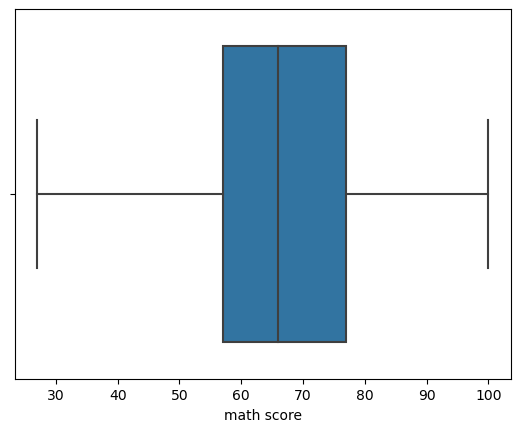

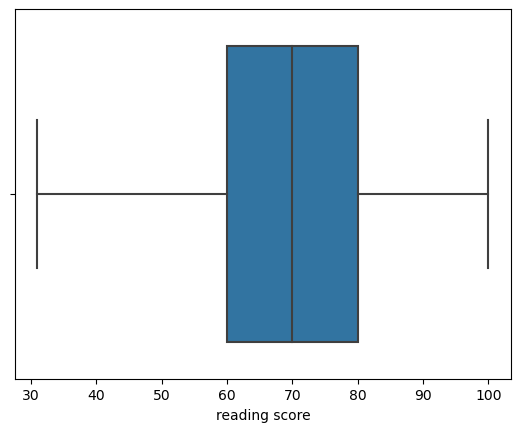

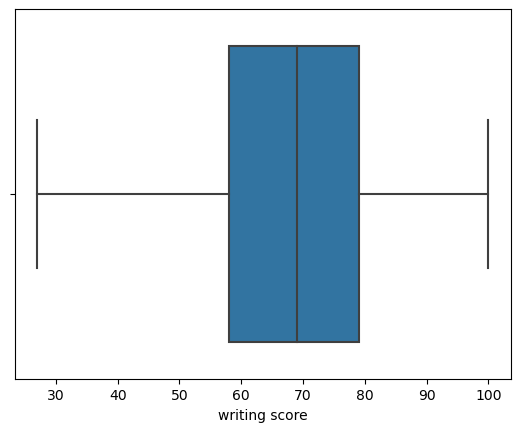

In [26]:
for i in df.columns:
    if df[i].dtypes!="object":
        sns.boxplot(x=df[i])
        plt.show()

In [28]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  8
writing score                  5
dtype: int64

In [29]:
df.dropna(inplace=True)

In [30]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [31]:
le=LabelEncoder()

In [32]:
for i in df.columns:
    if df[i].dtype =="object":
        df[i]=le.fit_transform(df[i])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       986 non-null    int32  
 1   race/ethnicity               986 non-null    int32  
 2   parental level of education  986 non-null    int32  
 3   lunch                        986 non-null    int32  
 4   test preparation course      986 non-null    int32  
 5   math score                   986 non-null    float64
 6   reading score                986 non-null    float64
 7   writing score                986 non-null    float64
dtypes: float64(3), int32(5)
memory usage: 50.1 KB


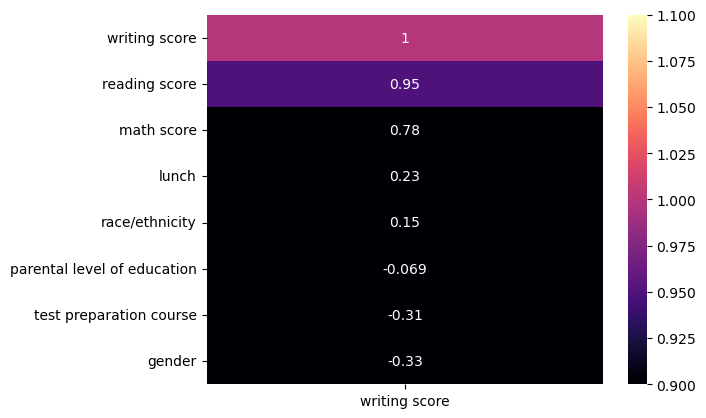

In [36]:
sns.heatmap(df.corr()[['writing score']].sort_values(by="writing score",ascending=False),vmin=1,vmax=1,annot=True,cmap='magma');

In [38]:
x=df[["math score","reading score"]].values

In [40]:
y=df[["writing score"]].values

In [41]:
sc=StandardScaler()

In [42]:
x=sc.fit_transform(x)

In [43]:
models=({
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
})

In [44]:
for name,model in models.items():
    scores = cross_val_score(model,x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model :{}".format(name))
    rmse=np.sqrt(-scores)
    rmse_average=np.mean(rmse)
    print("Average rmse: ",rmse_average)
    print("*"*100)

cross validation model :LinearRegression
Average rmse:  4.4727100258114145
****************************************************************************************************
cross validation model :Ridge
Average rmse:  4.472660141520508
****************************************************************************************************
cross validation model :LinearSVR
Average rmse:  4.502294479519269
****************************************************************************************************
cross validation model :DecisionTreeRegressor
Average rmse:  5.868693849125421
****************************************************************************************************
cross validation model :GradientBoostingRegressor
Average rmse:  4.65412721991114
****************************************************************************************************
cross validation model :AdaBoostRegressor
Average rmse:  4.760129024862836
******************************************************

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [46]:
model=LinearSVR()

In [48]:
model.fit(x_train,y_train)

LinearSVR()

In [49]:
training_score=model.score(x_train,y_train)
training_score

0.8985653875646573

In [50]:
y_pred= model.predict(x)

In [51]:
R2_Score=r2_score(y,y_pred)*100
R2_Score

90.17911763732737

In [52]:
Prediction=pd.DataFrame(zip(y,y_pred),columns=('Actual','Predicted'),dtype=float)
Prediction

,Actual,Predicted
0,74.0,70.608855
1,88.0,86.944927
2,93.0,93.267576
3,44.0,54.747367
4,75.0,76.462957
...,...,...
981,95.0,96.788815
982,55.0,54.131232
983,65.0,68.624935
984,77.0,75.808966


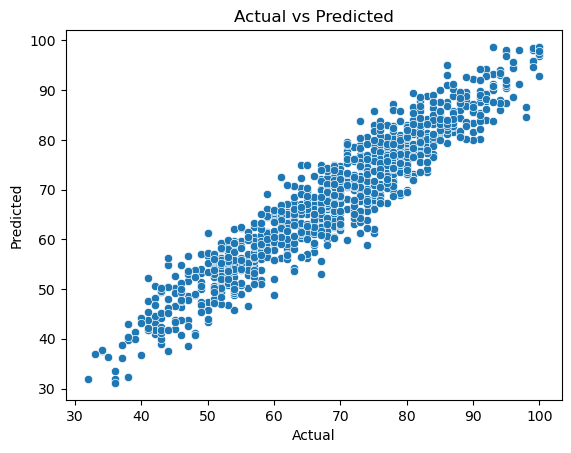

In [54]:
plt.figuresize=(18,6)
plt.title("Actual vs Predicted")
sns.scatterplot(data=Prediction,x="Actual",y="Predicted")
plt.show();

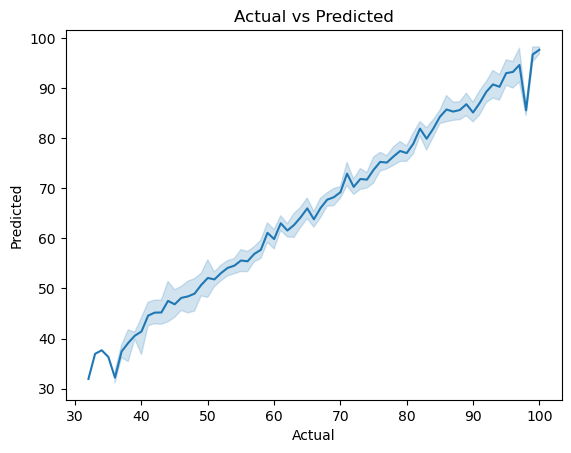

In [55]:
sns.lineplot(x="Actual",y="Predicted",data=Prediction)
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()